zadanie 1

In [231]:
import math
import numpy as np
import matplotlib.pyplot as plt
from random import random, randint


class TravelingSalesmanProblem:
    def __init__(self, points_number, swap_mode, state):
        mode = {"arbitrary swap": self.arbitrary_swap_state, "consecutive swap": self.consecutive_swap_state}
        self.mode = mode[swap_mode]
        self.points_number = points_number
        self.state = state

    def distance(self, p1, p2):
        return math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)

    def get_cost(self, path):
        return sum((self.distance(path[i + 1], path[i]) for i in range(self.points_number - 1))) + self.distance(
            path[self.points_number - 1], path[0])

    def arbitrary_swap_state(self):
        point1, point2 = np.random.randint(0, self.points_number, size=2)
        new_state = np.copy(self.state)
        new_state[[point1, point2]] = new_state[[point2, point1]]
        return new_state

    def consecutive_swap_state(self):
        point = np.random.randint(0, self.points_number)
        min_dist = math.inf
        new_state = np.copy(self.state)
        idx = 0

        for i in range(self.points_number):
            curr_dist = self.distance(new_state[i], new_state[point])
            if curr_dist < min_dist and i != point:
                min_dist = curr_dist
                idx = i
        new_state[[point, idx]] = new_state[[idx, point]]

        return new_state

    def swap_state(self):
        return self.mode()

    def get_state(self):
        return self.state


class SimulatedAnnealing:

    def __init__(self, problem, initial_temperature, factor, iter):
        self.initial_temperature = initial_temperature
        self.factor = factor
        self.problem = problem
        self.result = math.inf
        self.temperature = [initial_temperature]
        self.iter = iter
        self.costs = None

    def annealing(self):
        T = self.initial_temperature
        best_cost = self.problem.get_cost(self.problem.get_state())
        self.costs = [best_cost]
        for _ in range(self.iter):
            curr_state = self.problem.swap_state()
            curr_cost = self.problem.get_cost(curr_state)

            if curr_cost < best_cost:
                best_cost = curr_cost
                self.problem.state = curr_state
                self.costs.append(curr_cost)
            else:
                # val = np.random.uniform()
                if np.random.random() < math.e ** ((best_cost - curr_cost) / T):
                    best_cost = curr_cost
                    self.problem.state = curr_state
                    self.costs.append(curr_cost)
                else:
                    self.costs.append(best_cost)

            T *= self.factor
            self.temperature.append(T)
        self.result = best_cost


def get_result(self):
    return self.result, self.problem.get_state()


def print_solution(start_state, end_state, start_cost, end_cost):
    fig = plt.figure(figsize=(20, 7))
    plt.axis('off')

    ax1 = fig.add_subplot(121)
    ax1.set_title('start cost ' + str(round(start_cost, 2)))
    ax2 = fig.add_subplot(122)
    ax2.set_title('end cost ' + str(round(end_cost, 2)))

    for i, j in zip(start_state[:-1], start_state[1:]):
        ax1.plot([i[0], j[0]], [i[1], j[1]], 'b')
    ax1.plot([start_state[0, 0], start_state[-1, 0]], [start_state[0, 1], start_state[-1, 1]], 'b')

    for i in start_state:
        ax1.plot(i[0], i[1], 'ro')

    for i, j in zip(end_state[:-1], end_state[1:]):
        ax2.plot([i[0], j[0]], [i[1], j[1]], 'b')
    ax2.plot([end_state[0, 0], end_state[-1, 0]], [end_state[0, 1], end_state[-1, 1]], 'b')

    for i in start_state:
        ax2.plot(i[0], i[1], 'ro')
    plt.show()


def run(state, initial_temperature, factor, iter, swap_mode="arbitrary swap", show_costs=False):
    tsp = TravelingSalesmanProblem(20, swap_mode, state)

    start_state = tsp.get_state()
    start_cost = tsp.get_cost(start_state)

    algo = SimulatedAnnealing(tsp, initial_temperature, factor, iter)
    algo.annealing()

    end_state = tsp.get_state()
    end_cost = tsp.get_cost(end_state)

    print_solution(start_state, end_state, start_cost, end_cost)

    if show_costs:
        fig = plt.figure(figsize=(20, 7))
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)
        ax1.plot(algo.costs)
        ax2.plot(algo.temperature)
        plt.show()


def generate_points_uniform(n, size):
    return np.random.uniform((0, 0), (size, size), (n, 2))


def generate_points_normal(n, size):
    mu = (size // 2, size // 2)
    sigma = (5 * np.identity(2))
    return np.random.multivariate_normal(mu, sigma, n)


def generate_points_groups(n, groups):
    return np.array([[randint(1, groups) + random() / groups,
                      randint(1, groups) + random() / groups] for _ in range(n)])


a)

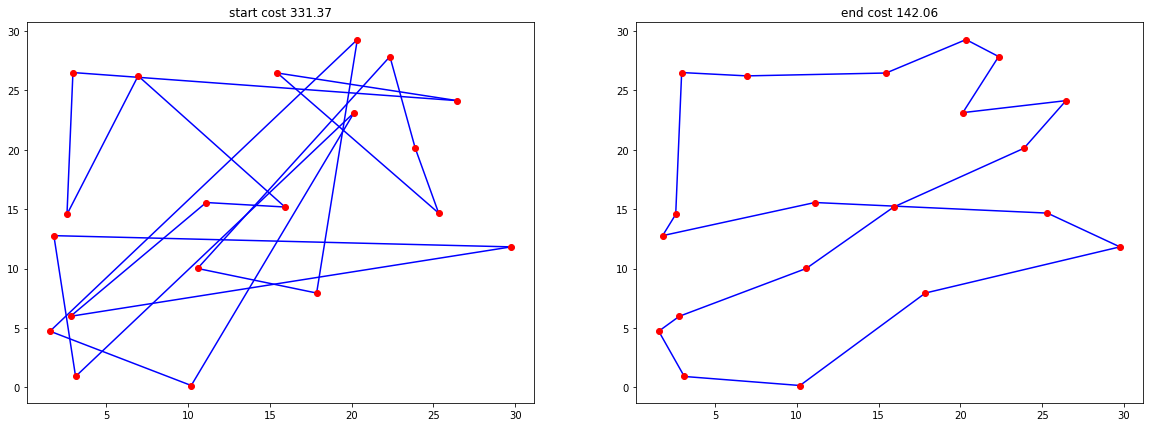

In [246]:
run(generate_points_uniform(20, 30), 5000, 0.995, 5000)

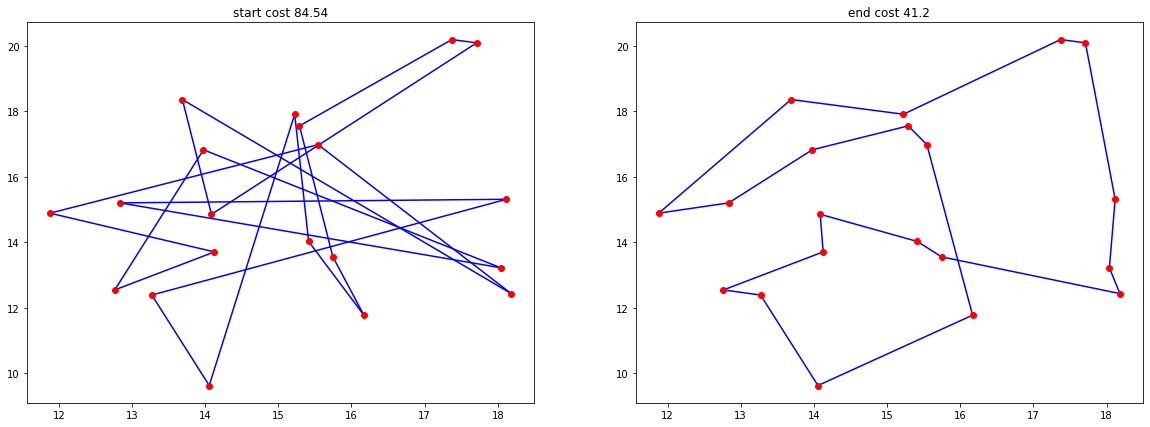

In [248]:
run(generate_points_normal(20, 30), 300, 0.995, 5000)

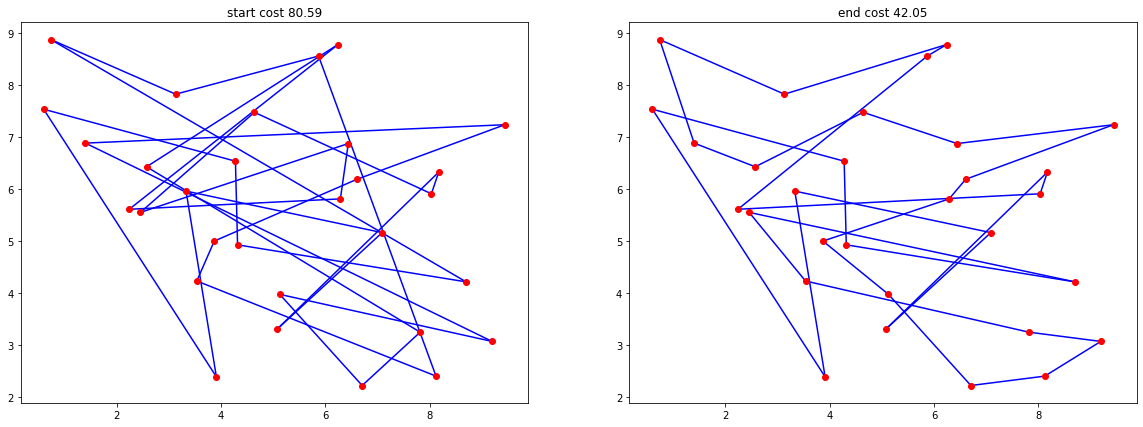

In [249]:
run(generate_points_normal(30, 10), 5500, 0.994, 4000)

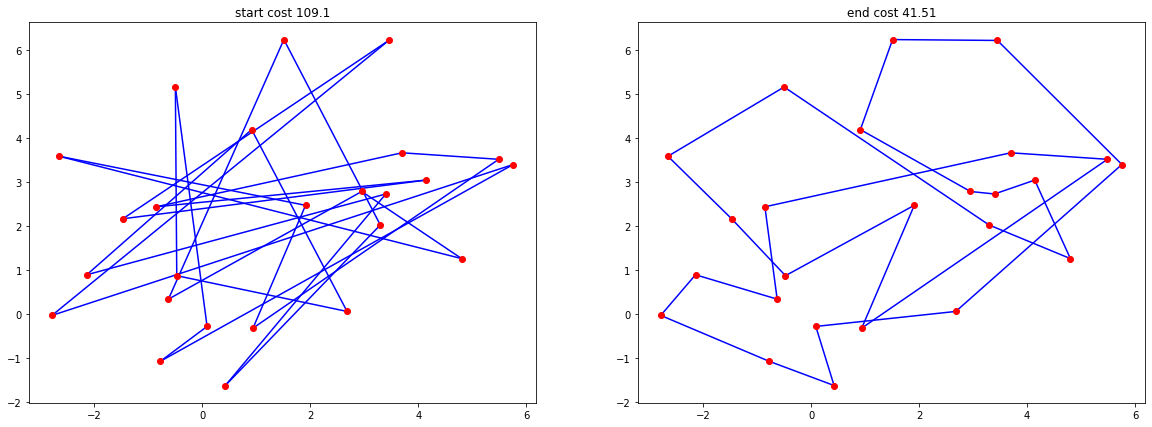

In [250]:
run(generate_points_normal(25, 5), 300, 0.99, 2000)

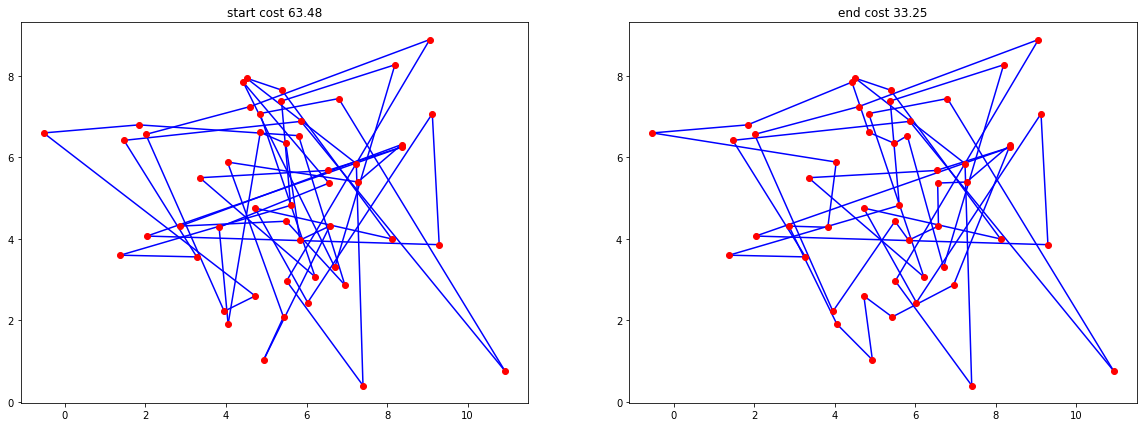

In [253]:
run(generate_points_normal(50, 10), 7000, 0.99, 10000)

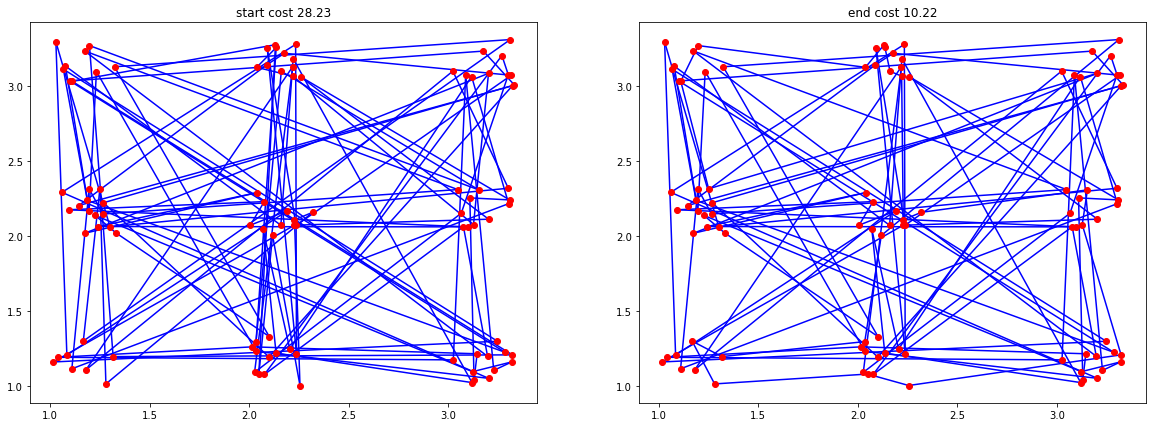

In [254]:
run(generate_points_groups(100, 3), 300, 0.995, 2000)

b)

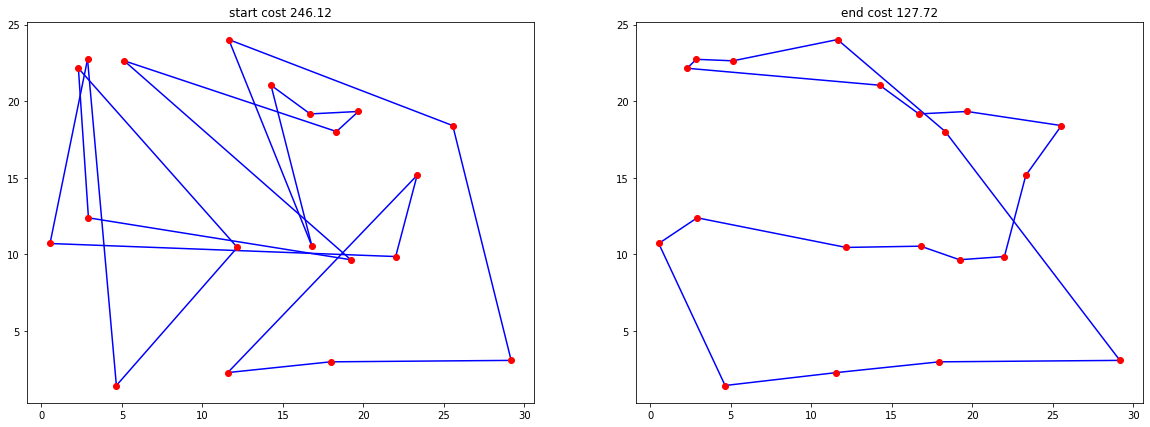

In [255]:
state = generate_points_uniform(20, 30)
run(state, 300, 0.995, 2000, swap_mode="arbitrary swap")

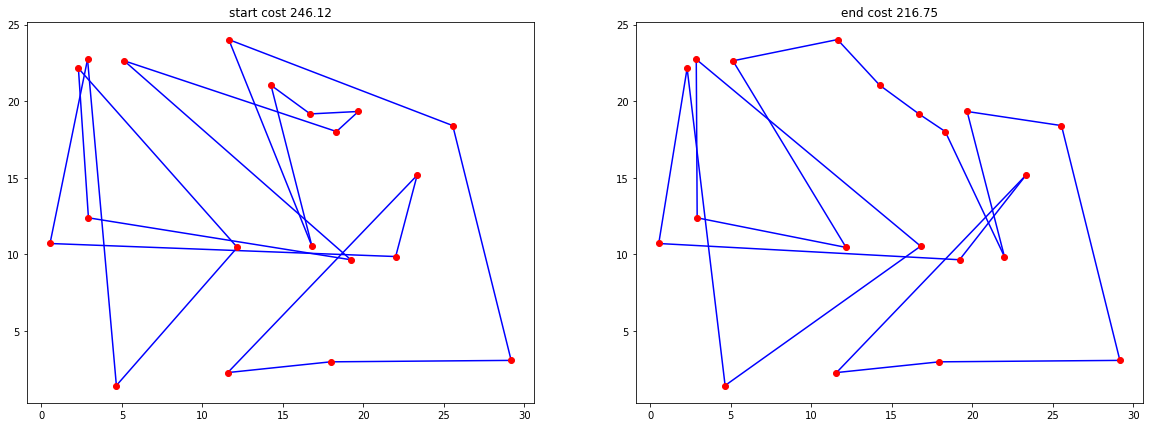

In [256]:
run(state, 300, 0.995, 2000, swap_mode="consecutive swap")

c)

In [240]:
state = generate_points_uniform(50, 100)

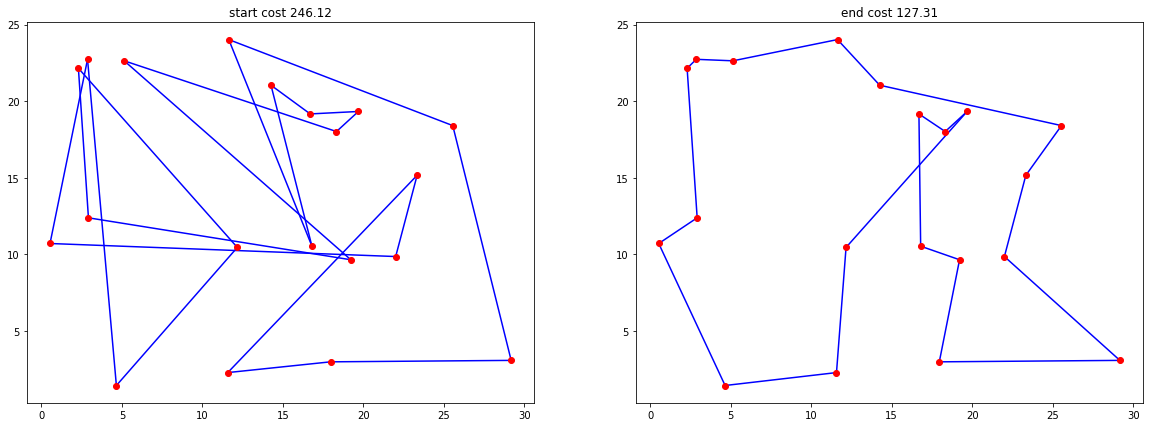

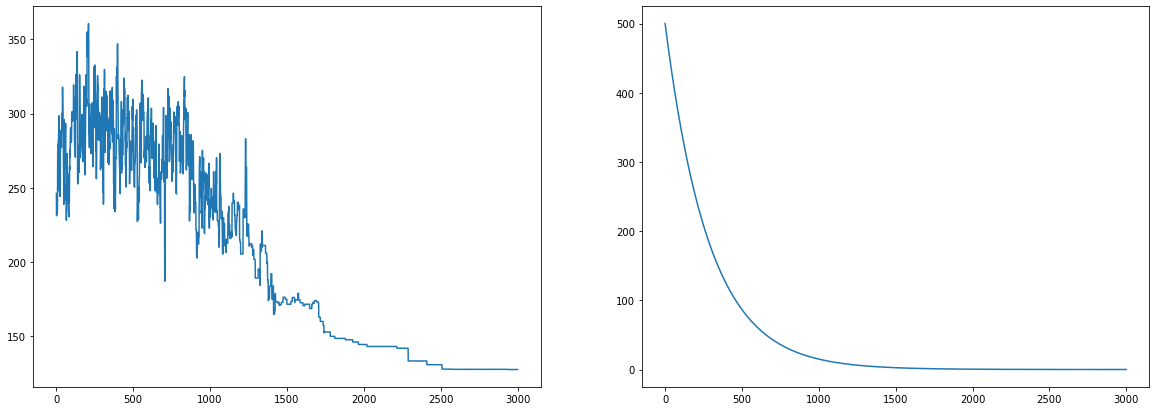

In [266]:
run(state, 500, 0.9965, 3000, show_costs=True)

zadanie 2

neighborhood type: 4


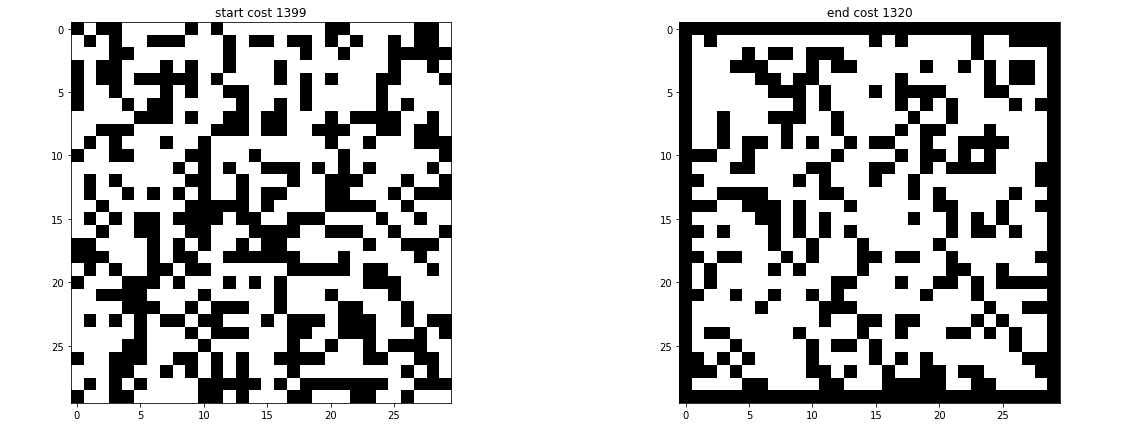

neighborhood type: 8


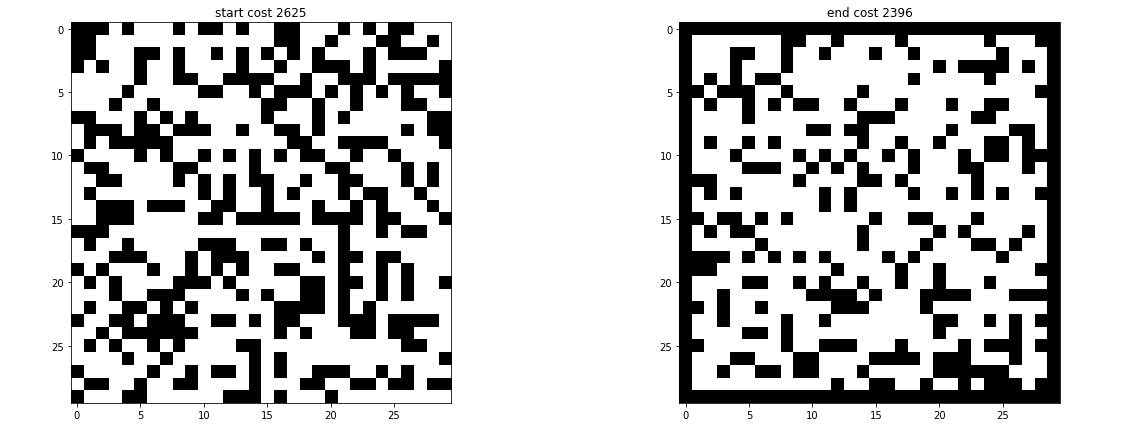

neighborhood type: 16


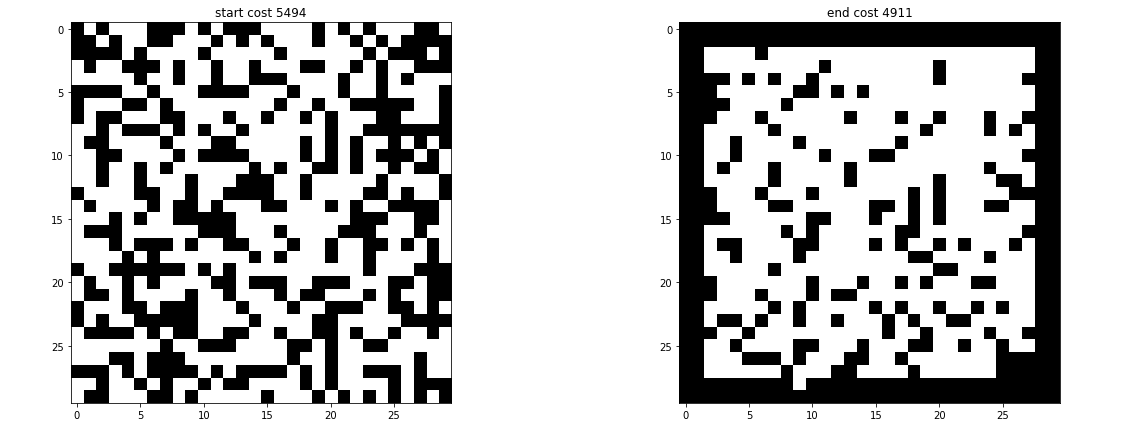

neighborhood type: special


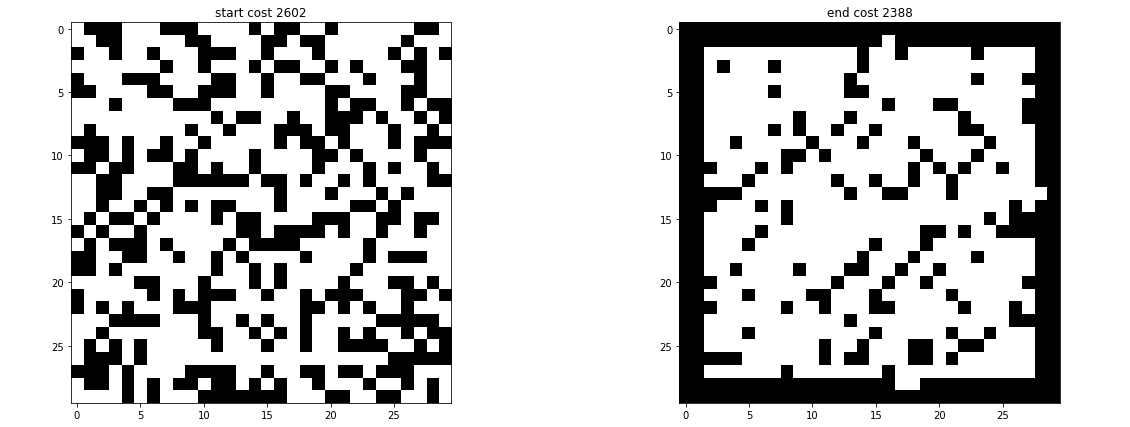

In [286]:
from matplotlib.colors import LinearSegmentedColormap


class BinaryImageProblem:
    def __init__(self, state, neighborhood):
        self.points_number = len(state)
        self.state = state
        self.neighborhood = neighborhood

    def get_cost(self, state):
        vector = {'4': [(0, 1), (1, 0), (0, -1), (-1, 0)],
                  '8': [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (1, 1), (-1, 1), (1, -1)], '16':
                      [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (1, 1), (-1, 1), (1, -1), (0, -2), (0, 2), (2, 0),
                       (-2, 0), (2, 2), (-2, -2), (2, -2), (-2, 2)],
                  'special': [(0, 1), (1, 0), (0, -1), (-1, 0), (0, -2), (0, 2), (2, 0), (-2, 0)]}
        vector = vector[self.neighborhood]
        cost = 0
        for i in range(self.points_number):
            for j in range(self.points_number):
                for v in vector:
                    x = i + v[0]
                    y = j + v[1]
                    if x < 0 or y < 0 or x >= self.points_number or y >= self.points_number:
                        continue
                    elif state[x][y] == 1:
                        cost += 1

        return cost

    def swap_state(self):
        x1, y1, x2, y2 = np.random.randint(0, self.points_number, size=4)
        new_state = np.copy(self.state)
        new_state[x1, y1], new_state[x2, y2] = new_state[x2, y2], new_state[x1, y1]

        return new_state

    def get_state(self):
        return self.state


def generate_image(n, probability):
    return np.array([[np.random.binomial(1, probability) for _ in range(n)] for _ in range(n)])


def print_solution(start_state, end_state, start_cost, end_cost):
    fig = plt.figure(figsize=(20, 7))
    plt.axis('off')
    cmap = LinearSegmentedColormap.from_list('', ['white', 'black'], 2)

    ax1 = fig.add_subplot(121)
    ax1.set_title('start cost ' + str(round(start_cost, 2)))
    ax1.imshow(start_state, cmap=cmap)

    ax2 = fig.add_subplot(122)
    ax2.set_title('end cost ' + str(round(end_cost, 2)))
    ax2.imshow(end_state, cmap=cmap)
    plt.show()


def run(neighborhood, n_points, probability, init_temp, factor, iter):
    print("neighborhood type: " + neighborhood)
    start_state = generate_image(n_points, probability)
    problem = BinaryImageProblem(start_state, neighborhood)
    start_cost = problem.get_cost(start_state)

    algo = SimulatedAnnealing(problem, init_temp, factor, iter)
    algo.annealing()

    end_state = problem.get_state()
    end_cost = problem.get_cost(end_state)

    print_solution(start_state, end_state, start_cost, end_cost)


run('4', 30, 0.4, 300, 0.995, 10000)
run('8', 30, 0.4, 300, 0.995, 10000)
run('16', 30, 0.4, 300, 0.995, 10000)
run('special', 30, 0.4, 300, 0.995, 10000)


zadanie 3

In [384]:


class SudokuProblem:
    def __init__(self, state):
        self.size = len(state)
        self.state = self.initial_state(state)

    def get_cost(self, state):
        cost = 0

        for i in state:
            _, counts = np.unique(i, return_counts=True)
            cost += sum(counts > 1)
        for i in state.transpose():
            _, counts = np.unique(i, return_counts=True)
            cost += sum(counts > 1)

        for i in range(0,self.size,3):
            for j in range(0,self.size,3):
                _, counts = np.unique(state[i:i+3,j:j+3], return_counts=True)
                cost += sum(counts > 1)

        return cost
    def swap_state(self):
        x1, y1, x2, y2 = np.random.randint(0, self.size, size=4)
        new_state = np.copy(self.state)
        new_state[x1, y1], new_state[x2, y2] = new_state[x2, y2], new_state[x1, y1]

        return new_state

    def get_state(self):
        return self.state

    def initial_state(self, state):
        _, counts = np.unique(state, return_counts=True)
        idx = 0

        for i in range(1,self.size + 1):
            if counts[i] != 0:
                idx = i
                break

        for i in range(self.size):
            for j in range(self.size):
                if state[i][j] == 0:
                    if counts[idx] == 9:
                        idx += 1
                    counts[idx] += 1
                    state[i][j] = idx

        return state

def read_sudoku_from_file(file_name):
    file = open(file_name, "r")
    sudoku = np.array([list(line) for line in file.read().splitlines()])
    sudoku[sudoku == "x"] = 0
    sudoku = sudoku.astype(int)

    return sudoku

def print_sudoku(board):
    print("-"*25)
    for idx, row in enumerate(board):
        rowStr = " | ".join([" ".join(map(str, row[i:i+3])) for i in range(0, len(row), 3)])
        print(f'| {rowStr} |')
        if (idx+1) % 3 == 0:
            print("-"*25)

def run(file_name,init_temp,factor,iter):
    sudoku = read_sudoku_from_file(file_name)
    sudoku = SudokuProblem(sudoku)

    print("start cost: ", sudoku.get_cost(sudoku.get_state()))
    print_sudoku(sudoku.get_state())

    algo = SimulatedAnnealing(sudoku,init_temp,factor,iter)
    algo.annealing()

    print("end cost: ", sudoku.get_cost(sudoku.get_state()))
    print("initial temperature: ", init_temp)
    print("factor: ", factor)
    print("iterations: ", iter)
    print_sudoku(sudoku.get_state())

run("sudoku1.txt", 1000,0.997,20000)
run("sudoku2.txt", 1000,0.997,34000)

start cost:  49
-------------------------
| 1 1 3 | 1 2 1 | 6 1 2 |
| 9 2 2 | 3 2 5 | 3 3 1 |
| 3 3 1 | 8 3 6 | 4 4 4 |
-------------------------
| 4 4 8 | 1 4 2 | 9 4 4 |
| 7 4 5 | 5 5 5 | 5 5 8 |
| 6 6 6 | 7 6 8 | 2 6 6 |
-------------------------
| 7 7 2 | 6 7 9 | 5 7 7 |
| 8 7 7 | 2 8 3 | 8 8 9 |
| 8 9 5 | 9 1 9 | 3 9 9 |
-------------------------
end cost:  0
initial temperature:  1000
factor:  0.997
iterations:  20000
-------------------------
| 4 7 2 | 8 5 6 | 3 9 1 |
| 1 3 5 | 2 9 4 | 7 8 6 |
| 6 9 8 | 1 7 3 | 4 2 5 |
-------------------------
| 5 4 9 | 6 2 7 | 8 1 3 |
| 2 8 6 | 5 3 1 | 9 4 7 |
| 7 1 3 | 9 4 8 | 6 5 2 |
-------------------------
| 9 6 7 | 4 1 5 | 2 3 8 |
| 8 2 1 | 3 6 9 | 5 7 4 |
| 3 5 4 | 7 8 2 | 1 6 9 |
-------------------------
start cost:  53
-------------------------
| 8 1 1 | 1 1 1 | 1 2 2 |
| 2 2 3 | 6 2 2 | 2 2 3 |
| 3 7 3 | 3 9 3 | 2 3 3 |
-------------------------
| 4 5 4 | 4 4 7 | 4 4 4 |
| 5 5 5 | 5 4 5 | 7 5 5 |
| 6 6 6 | 1 6 6 | 6 3 6 |
----------